In [1]:
import numpy as np 
import pandas as pd 

## Import data

In [58]:
df_test = pd.read_csv('test.csv')

In [59]:
df_train = pd.read_csv('train.csv')

In [60]:
df_test.shape

(200000, 201)

In [61]:
test_id = df_test['ID_code']

## Find fake test data

In [62]:
for var in df_test.columns[1:]:
    dict_count = df_test[var].value_counts().to_dict()
    new_col = var + '_unique'
    df_test[new_col] = df_test[var].apply(lambda s: 1 if dict_count[s]==1 else 0)
df_test['has_unique'] = np.sum(df_test.iloc[:,201:],axis=1).apply(lambda s: 1 if s>0 else 0)

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [63]:
df_test['has_unique'].value_counts()

0    100000
1    100000
Name: has_unique, dtype: int64

* In test data, half of them are fake data, half are real.

In [65]:
real_test = df_test[df_test['has_unique']==1].iloc[:,:201]
fake_test = df_test[df_test['has_unique']==0].iloc[:,:201]

## Combine train and read test data, then add new frequency features

In [66]:
train_realtest = pd.concat([df_train, real_test], axis=0)

In [67]:
for var in train_realtest.columns[2:]:
    dict_count = train_realtest[var].value_counts().to_dict()
    new_col = var + '_unique'
    train_realtest[new_col] = train_realtest[var].apply(lambda s: 0 if dict_count[s]>1 else 1)
    #train_realtest[new_col] = train_realtest[var].apply(lambda s: dict_count[s])
    #train_realtest[var] = train_realtest[var].apply(lambda s: None if dict_count[s]>1 else s)

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [68]:
train_realtest

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190_unique,var_191_unique,var_192_unique,var_193_unique,var_194_unique,var_195_unique,var_196_unique,var_197_unique,var_198_unique,var_199_unique
0,train_0,0.0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,0,0,0,0,0,0,0,0,0,0
1,train_1,0.0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,0,0,0,0,0,0,0,0,0,0
2,train_2,0.0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,0,0,0,0,0,0,0,0,0,0
3,train_3,0.0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,0,0,0,0,0,0,0,0,0,0
4,train_4,0.0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,test_199986,NaN,19.2884,-2.8384,11.9149,6.6611,12.3112,12.9244,5.6492,16.0449,...,0,0,0,0,0,0,0,0,0,0
199993,test_199993,NaN,14.6764,-8.1066,7.1167,2.4138,10.3845,-11.9327,4.7563,16.0455,...,0,0,0,0,0,0,0,0,0,1
199995,test_199995,NaN,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,...,1,0,0,0,1,0,0,0,0,1
199996,test_199996,NaN,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,...,1,0,0,0,0,0,0,0,0,1


## Split train and real test data

In [69]:
train_new = train_realtest[train_realtest['ID_code'].str.contains('train')]

In [70]:
test_new = train_realtest[train_realtest['ID_code'].str.contains('test')]

In [ ]:
X_df_test = df_test.drop(columns=['ID_code','has_unique'])

## Use others model

* Source: https://www.kaggle.com/code/enesimek/for-beginners-santander-prediction-lgbm-model/notebook

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import os
import logging
import datetime

import lightgbm as lgb

from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [95]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

In [98]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=44000)
oof = np.zeros(len(X_train_all))
predictions = np.zeros(len(df_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train_all.values, y_train_all.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(X_train_all.iloc[trn_idx], label=y_train_all.iloc[trn_idx])
    val_data = lgb.Dataset(X_train_all.iloc[val_idx], label=y_train_all.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(X_train_all.iloc[val_idx], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = X_train_all.columns
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(X_df_test, num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(y_train_all, oof)))

Fold 0
[LightGBM] [Info] Number of positive: 18089, number of negative: 161911
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 51398
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 399
Training until validation scores don't improve for 3000 rounds
[1000]	training's auc: 0.884729	valid_1's auc: 0.87229
[2000]	training's auc: 0.906369	valid_1's auc: 0.888434
[3000]	training's auc: 0.917577	valid_1's auc: 0.895498
[4000]	training's auc: 0.92511	valid_1's auc: 0.899001
[5000]	training's auc: 0.930659	valid_1's auc: 0.901082
[6000]	training's auc: 0.935342	valid_1's auc: 0.902598
[7000]	training's auc: 0.939599	valid_1's auc: 0.903252
[8000]	training's auc: 0.943474	valid_1's auc: 0.90392
[9000]	training's auc: 0.947177	valid_1's auc: 0.90414

[1000]	training's auc: 0.885258	valid_1's auc: 0.868171
[2000]	training's auc: 0.90668	valid_1's auc: 0.88547
[3000]	training's auc: 0.917913	valid_1's auc: 0.893291
[4000]	training's auc: 0.925291	valid_1's auc: 0.897239
[5000]	training's auc: 0.930935	valid_1's auc: 0.899471
[6000]	training's auc: 0.93577	valid_1's auc: 0.900738
[7000]	training's auc: 0.940032	valid_1's auc: 0.90166
[8000]	training's auc: 0.943971	valid_1's auc: 0.902298
[9000]	training's auc: 0.947623	valid_1's auc: 0.902572
[10000]	training's auc: 0.951019	valid_1's auc: 0.902777
[11000]	training's auc: 0.954347	valid_1's auc: 0.902834
[12000]	training's auc: 0.957458	valid_1's auc: 0.902764
[13000]	training's auc: 0.960316	valid_1's auc: 0.902809
Early stopping, best iteration is:
[10586]	training's auc: 0.952989	valid_1's auc: 0.902901
Fold 6
[LightGBM] [Info] Number of positive: 18088, number of negative: 161912
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079648 sec

In [101]:
b = pd.DataFrame({"ID_code": df_test['ID_code'], "target": predictions})

In [102]:
b.to_csv("submission10.csv", index = False) 

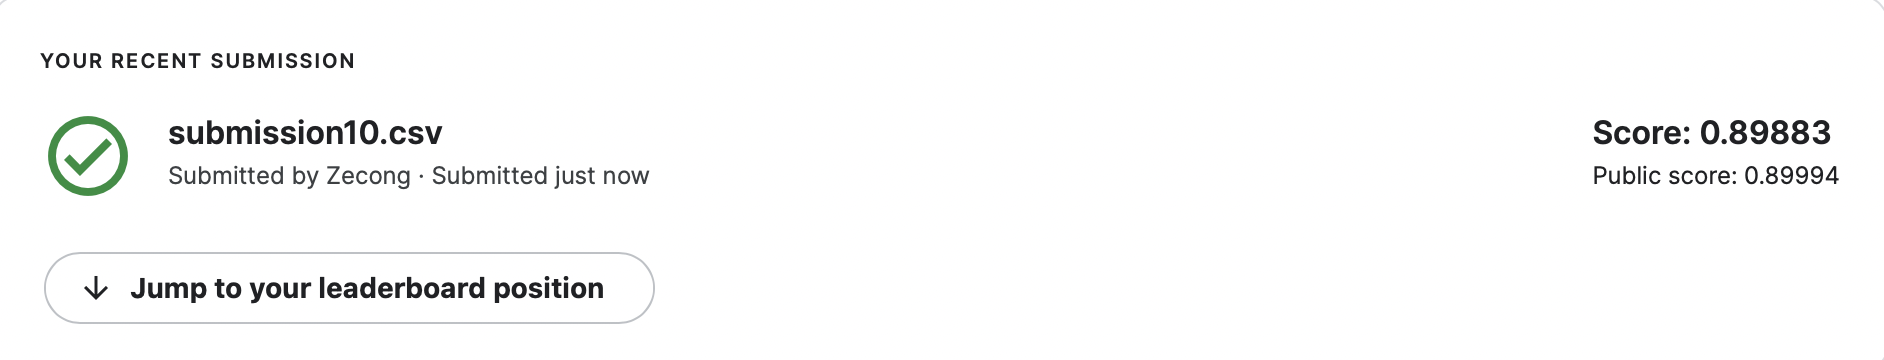

## Build 200 models

* each time use one original feature and corresponding frequency feature to build a model
* then use logit transfer the prediction of probability got from one model and sum up these result from 200 models
* then get mean of these result from 200 models and use exp to transfer into probability

* Actually I'm not sure why they use logit here, but I just follow that. And to get probability instead of large negative number, I used exp to transfer and the score looks good.

In [ ]:
from scipy.special import logit, expit

In [ ]:
X_train_all = train_new.drop(columns=['ID_code', 'target'])
y_train_all = train_new['target']

In [ ]:
#features = [x for x in X_train.columns if x.startswith("var")]
features = X_train_all.columns[0:200].to_list()

pred = 0
for var in features:
    model = lgb.LGBMClassifier(**{'learning_rate': 0.05, 
                                  'max_bin': 165, 
                                  'max_depth': 5, 
                                  'min_child_samples': 150,
                                  'min_child_weight': 0.1, 
                                  'min_split_gain': 0.0018, 
                                  'n_estimators': 41,
                                  'num_leaves': 6, 
                                  'reg_alpha': 2.0, 
                                  'reg_lambda': 2.54, 
                                  'objective': 'binary', 
                                  'n_jobs': -1})
    var_count_name = var + '_unique'
    model = model.fit(np.hstack([X_train_all[var].values.reshape(-1, 1),
                      X_train_all[var_count_name].values.reshape(-1, 1)]), y_train_all.values)
    pred += logit(model.predict_proba(np.hstack([X_df_test[var].values.reshape(-1, 1),
                  X_df_test[var_count_name].values.reshape(-1, 1)]))[:, 1])
    
#pd.DataFrame({"ID_code": test_id, "target": pred}).to_csv("submission3.csv", index = False)
b = pd.DataFrame({"ID_code": df_test['ID_code'], "target": pred})

In [ ]:
b['target'] = np.exp(b['target']/200)

In [ ]:
b.to_csv("submission8.csv", index = False) 

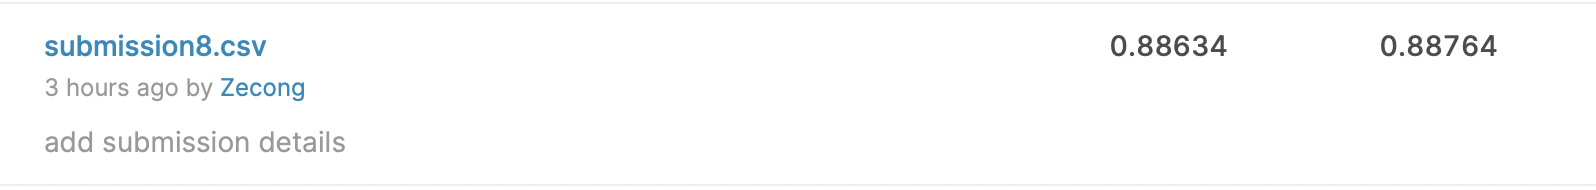

In [ ]:
#0.884: submission4 -- adding frequency 
#0.887: submission8 -- adding frequency and change frequency>1 into 0
#0.85: submission5 -- adding frequency and change unique frequency into None
#0.87 submission6 -- adding frequency and change non-unique frequency into None
#0.77 submission7 -- change original variable nonunique into None